# ROC curves
## Comparison of different trainings with different setups for inference

In [11]:
import numpy as np
import pandas

import matplotlib.pyplot as plt
import mplhep as hep


plt.style.use(hep.cms.style.ROOT)
plt.rcParams['axes.axisbelow'] = True

In [12]:
model_names = ['nominal','fgsm']#, ,'fgsm_flavour_008009010','fgsm_flavour_010009010']
prediction_setups = ['','_FGSM','_FGSM_flavour_012008010','_FGSM_domain_random']#',,]#, ]#
prediction_files = 'outfiles'
tagger = 'DF_Run2'
dirz = [[f'/eos/user/h/heschone/DeepJet/Train_{tagger}/{model_name}/predict{prediction_setup}/' \
        for model_name in model_names] for prediction_setup in prediction_setups]
save_dir = f'/eos/user/h/heschone/DeepJet/Plots/'

In [13]:
names_models = {
    'nominal': 'Nominal training',
    'fgsm': r'Adversarial training $\epsilon=0.01$',
    'fgsm_flavour_006008010': r'Adversarial training $\epsilon=(0.006,0.008,0.01)$',
    'fgsm_flavour_008009010': r'Adversarial training $\epsilon=(0.008,0.009,0.01)$',
    'fgsm_flavour_010009010': r'Adversarial training $\epsilon=(0.01,0.009,0.01)$'
}
names_setups = {
    '': 'nominal inputs',
    '_FGSM': r'fgsm inputs $\epsilon=0.01$',
    '_FGSM_flavour_default': r'fgsm_flavour inputs $\epsilon=(0.01,0.01,0.01)$',
    '_FGSM_flavour_012008010': r'fgsm_flavour inputs $\epsilon=(0.012,0.008,0.01)$',
    '_FGSM_domain_random': r'fgsm_domain inputs $\hat{\epsilon}=$random',
}
linestyles = {
    '': '-',
    '_FGSM': '--',
    '_FGSM_flavour_default': ':',
    '_FGSM_flavour_012008010': ':',
    '_FGSM_domain_default': '-.',
    '_FGSM_domain_random': '-.',
}
colors = {
    'nominal': 'tab:blue',
    'fgsm': 'tab:orange',
    'fgsm_flavour_006008010': 'tab:red',
    'fgsm_flavour_008009010': 'tab:purple',
    'fgsm_flavour_010009010': 'tab:green'
}

In [14]:
dirz

[['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/',
  '/eos/user/h/heschone/DeepJet/Train_DF_Run2/fgsm/predict/'],
 ['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/',
  '/eos/user/h/heschone/DeepJet/Train_DF_Run2/fgsm/predict_FGSM/'],
 ['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM_flavour_012008010/',
  '/eos/user/h/heschone/DeepJet/Train_DF_Run2/fgsm/predict_FGSM_flavour_012008010/'],
 ['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM_domain_random/',
  '/eos/user/h/heschone/DeepJet/Train_DF_Run2/fgsm/predict_FGSM_domain_random/']]

In [15]:
NEW_BvsL_paths = [item + f'BvL_{prediction_files}_NEW.npy' for sublist in dirz for item in sublist]
NEW_CvsB_paths = [item + f'CvB_{prediction_files}_NEW.npy' for sublist in dirz for item in sublist]
NEW_CvsL_paths = [item + f'CvL_{prediction_files}_NEW.npy' for sublist in dirz for item in sublist]

In [16]:
#NEW_BvsL_paths
NEW_CvsB_paths
#NEW_CvsL_paths

['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/CvB_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/fgsm/predict/CvB_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/CvB_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/fgsm/predict_FGSM/CvB_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM_flavour_012008010/CvB_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/fgsm/predict_FGSM_flavour_012008010/CvB_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM_domain_random/CvB_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/fgsm/predict_FGSM_domain_random/CvB_outfiles_NEW.npy']

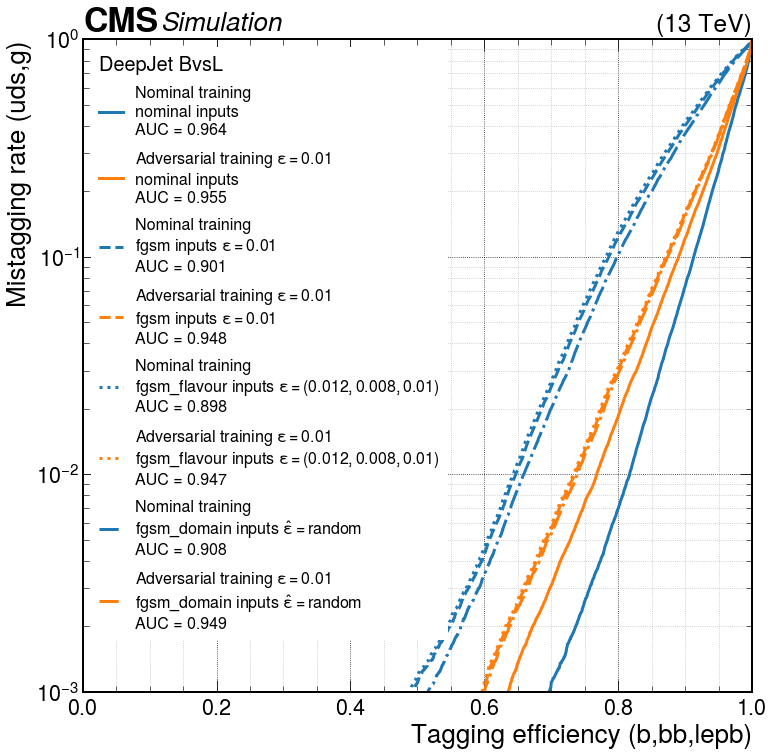

In [17]:
# BvsL
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (b,bb,lepb)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'BvsL'
legloc = 'upper left'
for i in range(len(model_names)*len(prediction_setups)):
    xya = np.load(NEW_BvsL_paths[i], allow_pickle=True)
    model=model_names[i % len(model_names)]
    prediction=prediction_setups[int(i/len(model_names))]
    legend_text = names_models[model] + '\n' + names_setups[prediction] + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[prediction], color=colors[model],linewidth=3.0,label=legend_text)
leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
fig.savefig(save_dir + legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
#fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)

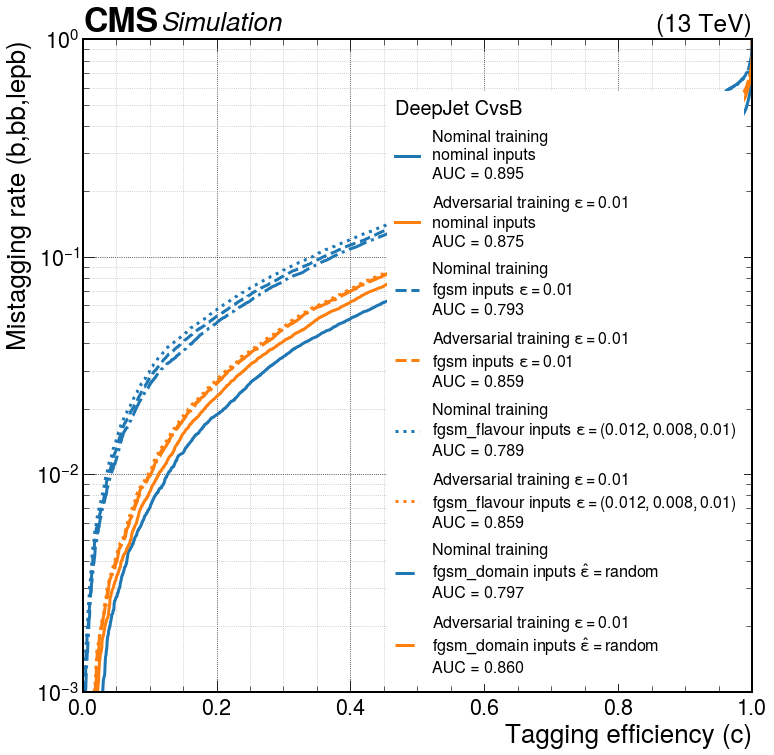

In [18]:
# CvsB
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)

ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (b,bb,lepb)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'CvsB'
legloc = 'lower right'
for i in range(len(model_names)*len(prediction_setups)):
    xya = np.load(NEW_CvsB_paths[i], allow_pickle=True)
    model=model_names[i % len(model_names)]
    prediction=prediction_setups[int(i/len(model_names))]
    legend_text = names_models[model] + '\n' + names_setups[prediction] + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[prediction], color=colors[model],linewidth=3.0,label=legend_text)
leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'left'#'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
fig.savefig(save_dir + legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
#fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)

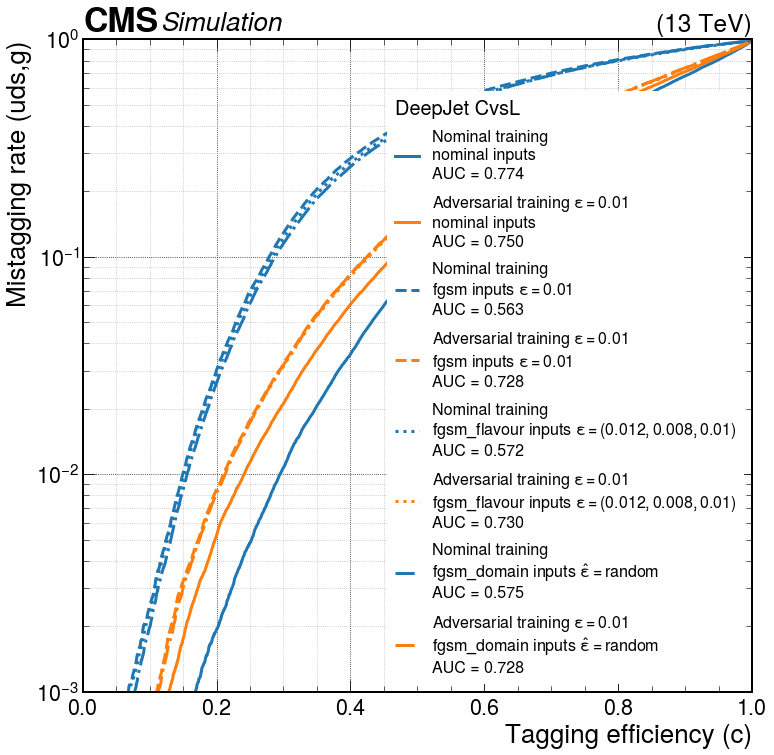

In [19]:
# CvsL
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'CvsL'
legloc = 'lower right'
for i in range(len(model_names)*len(prediction_setups)):
    xya = np.load(NEW_CvsL_paths[i], allow_pickle=True)
    model=model_names[i % len(model_names)]
    prediction=prediction_setups[int(i/len(model_names))]
    legend_text = names_models[model] + '\n' + names_setups[prediction] + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[prediction], color=colors[model],linewidth=3.0,label=legend_text)
leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'left'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
fig.savefig(save_dir + legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
#fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)

In [20]:
print(xya)

[0        0.000000
 11       0.016113
 13       0.019396
 15       0.020582
 17       0.022513
            ...
 52589    0.999890
 52591    0.999917
 52593    0.999945
 52595    0.999972
 52597    1.000000
 Name: tpr, Length: 27448, dtype: float64
 0        0.000000
 11       0.000005
 13       0.000009
 15       0.000014
 17       0.000018
            ...
 52589    0.998598
 52591    0.998689
 52593    0.999008
 52595    0.999977
 52597    1.000000
 Name: fpr, Length: 27448, dtype: float64 0.7281044681302524]
